In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Downloads/CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
#Make a Copy of the Original dataset Which can help me in future 
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)

# Data Preprocessing

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

In [9]:
#First Of all we seperate categorical and numerical data 
cat = df.select_dtypes(include="object")
num = df.select_dtypes(include="number")

In [10]:
cat.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


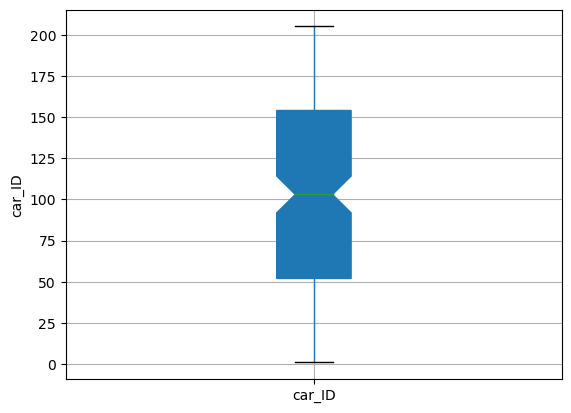

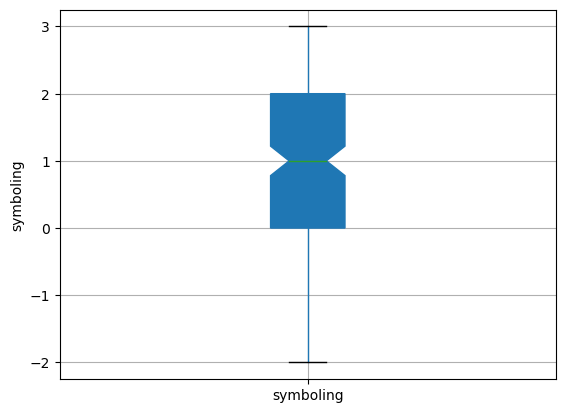

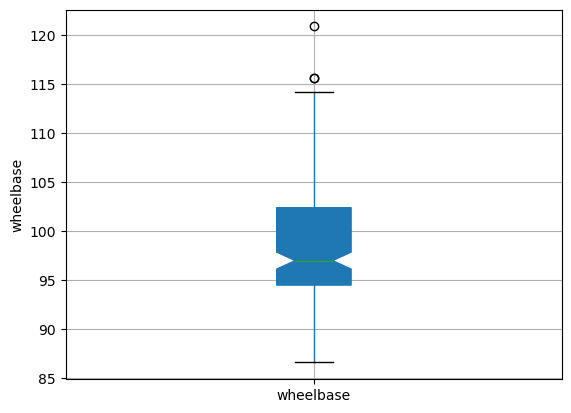

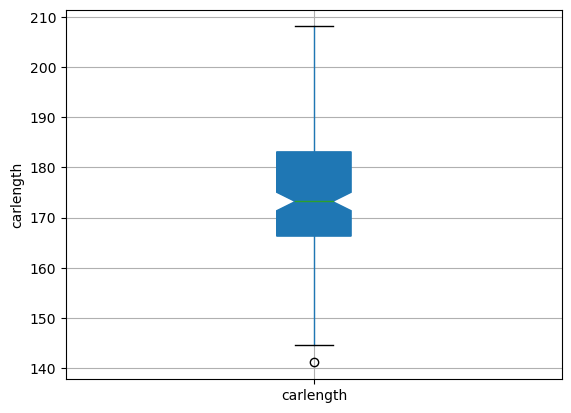

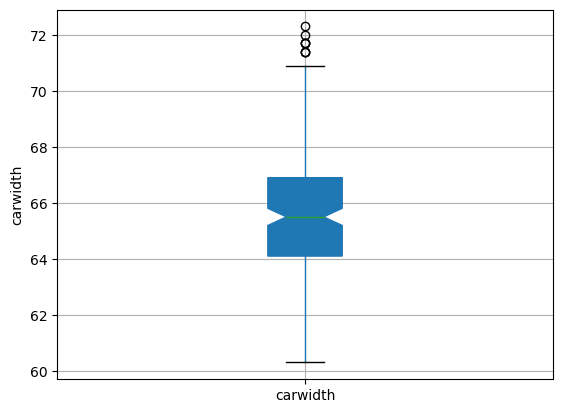

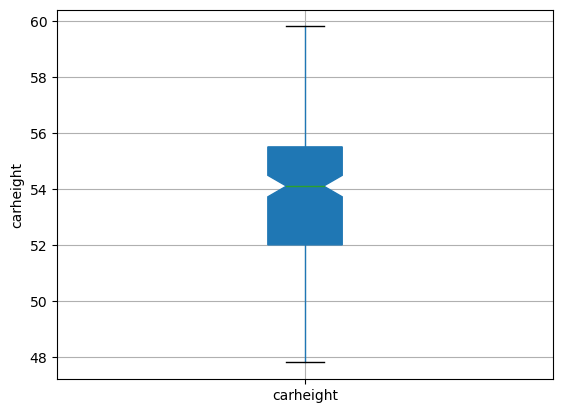

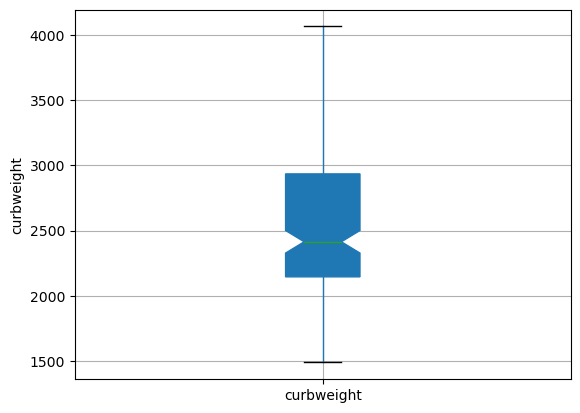

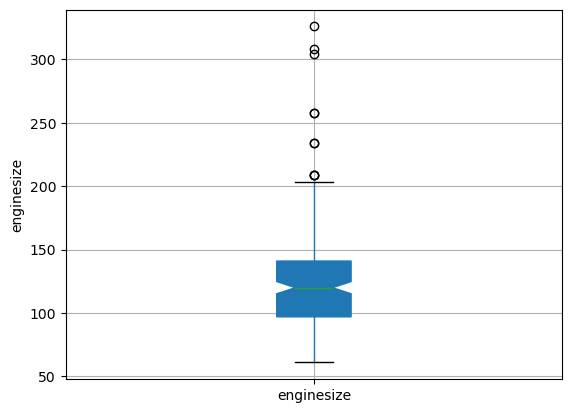

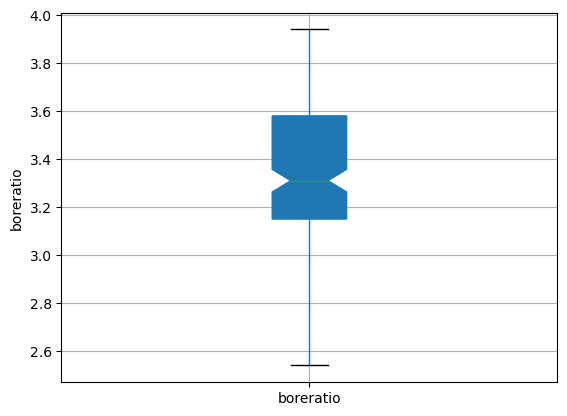

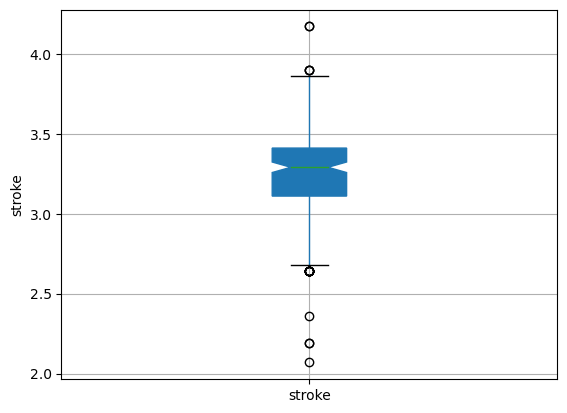

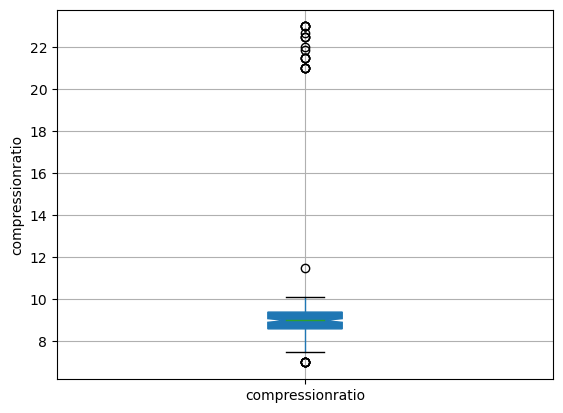

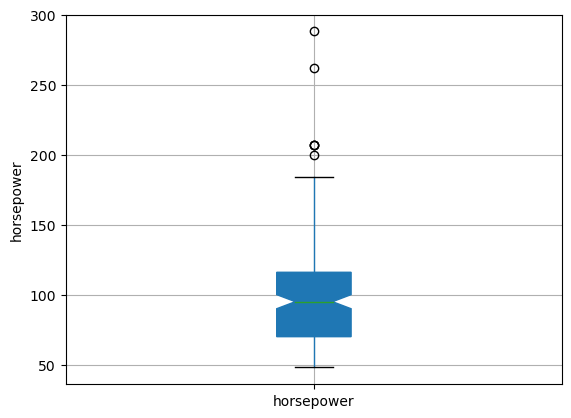

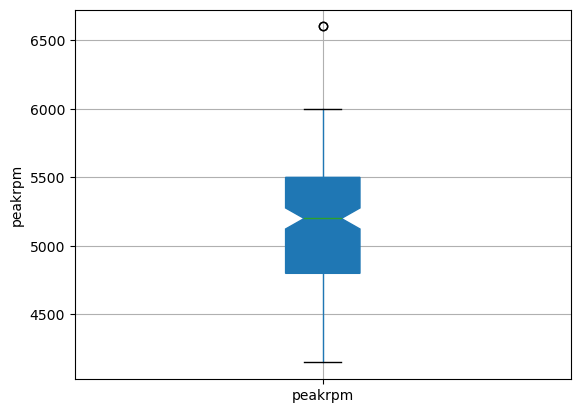

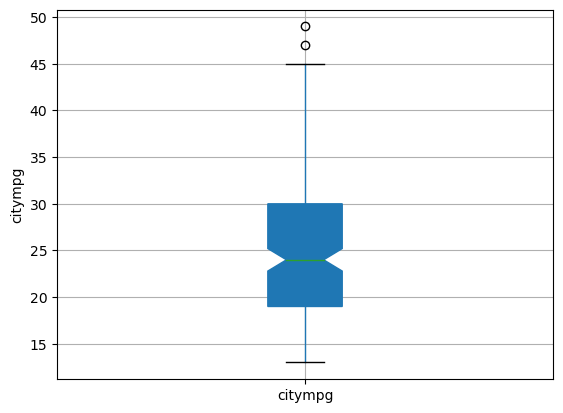

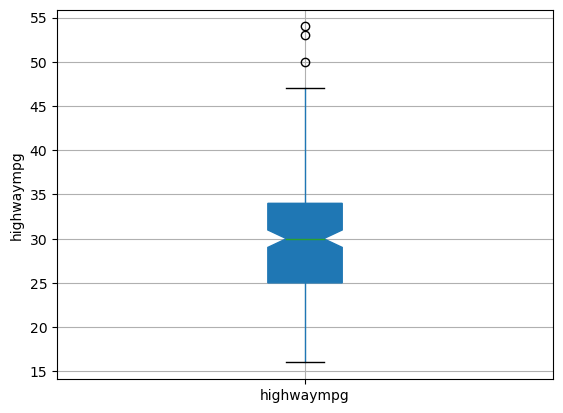

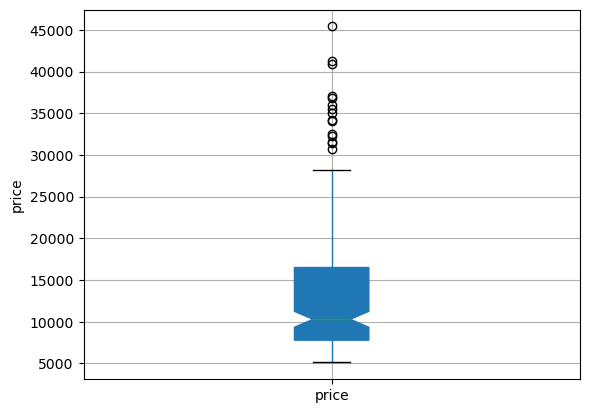

In [11]:
#for numerical distrubition 
for i in num:
    num.boxplot(column=i,patch_artist = True, notch ='True')
    plt.ylabel(i)
    plt.show()

In [12]:
#we check distrubition of the numerical data

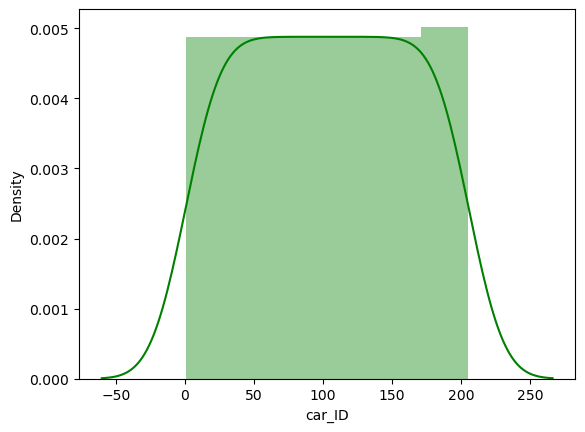

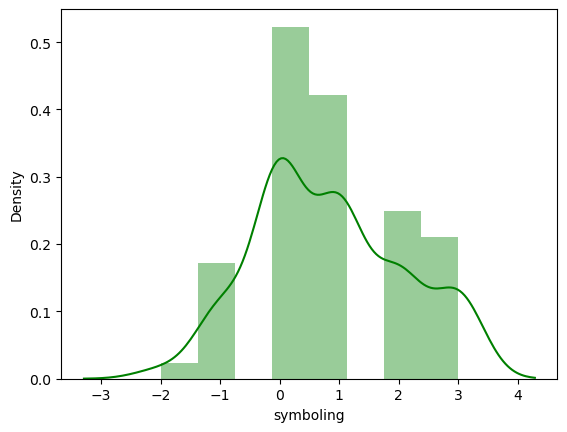

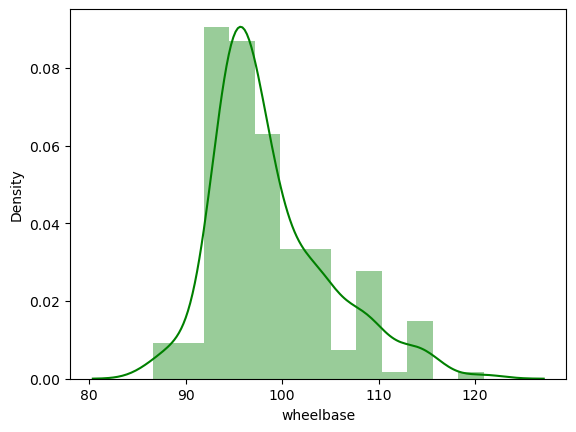

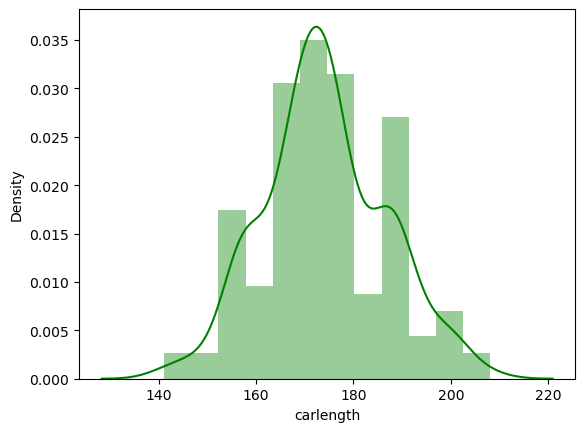

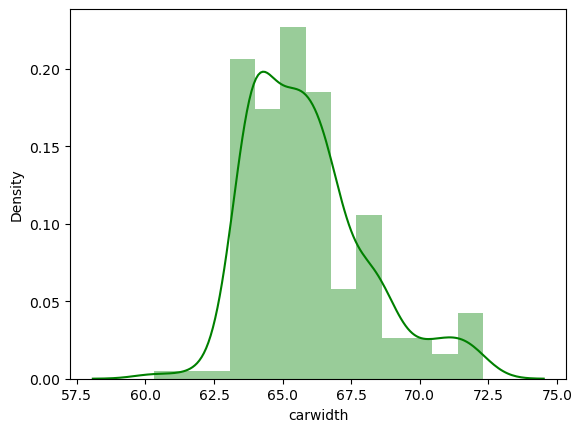

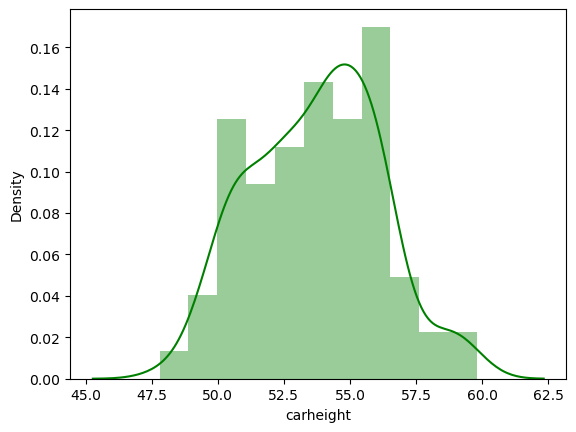

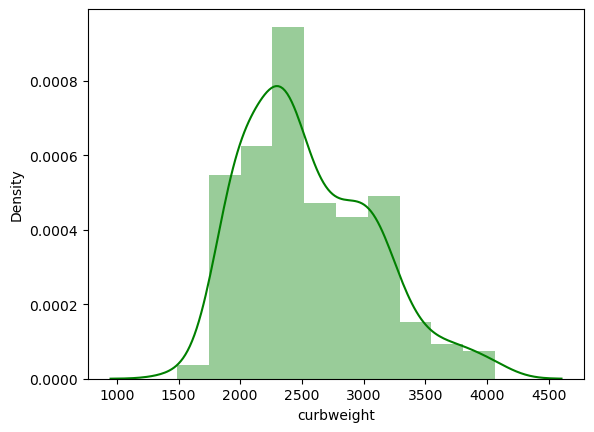

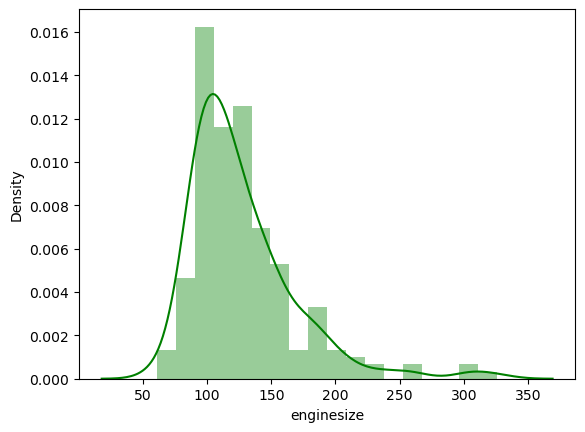

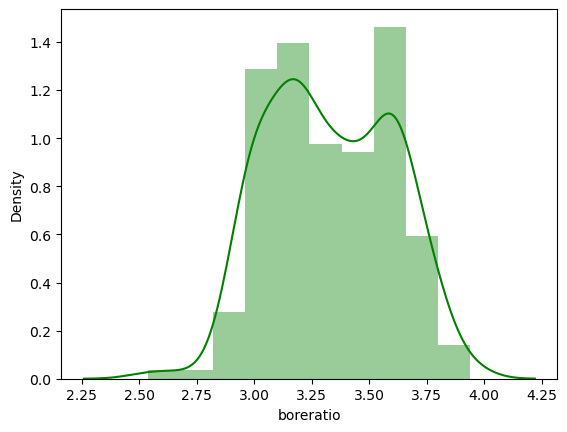

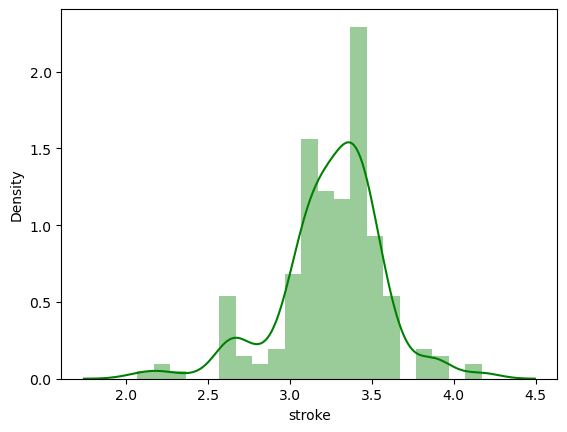

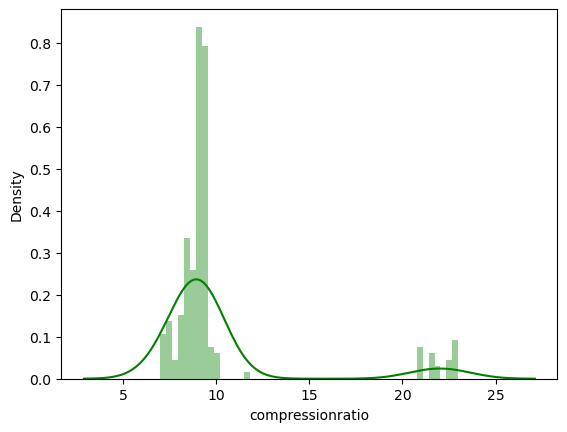

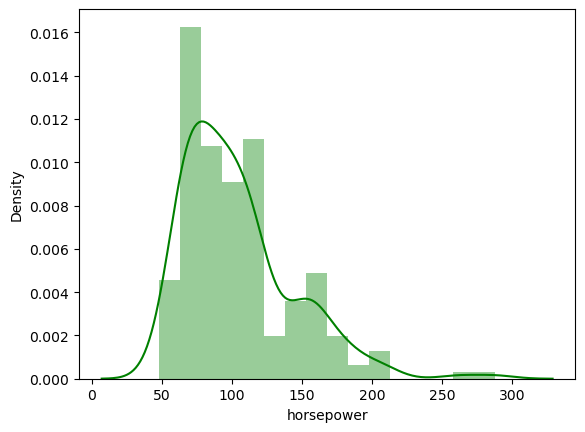

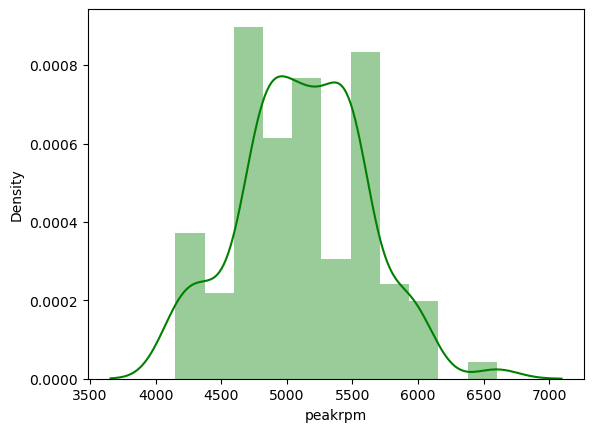

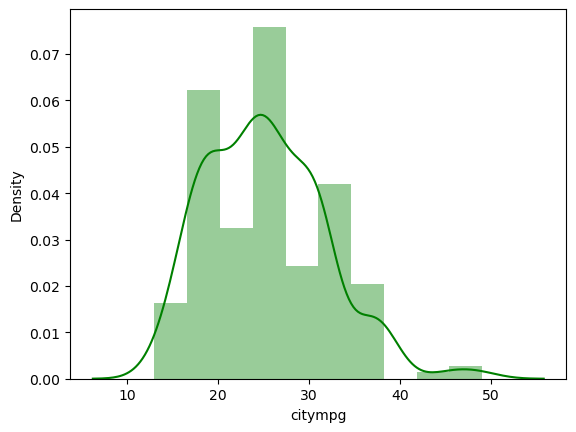

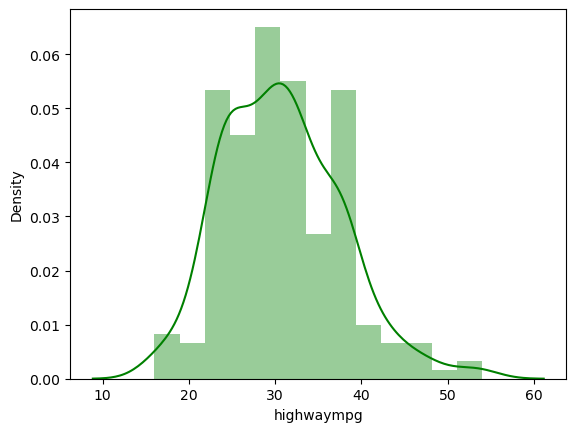

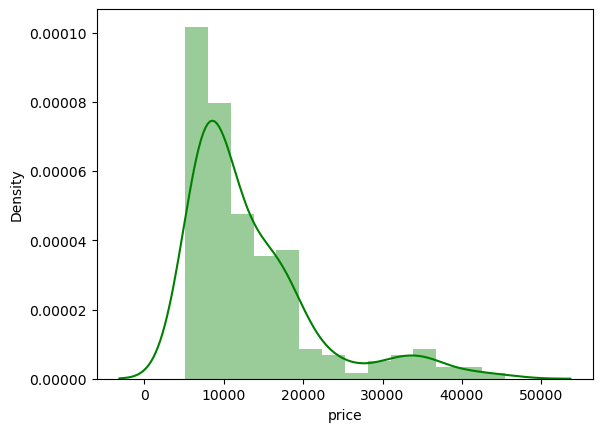

In [13]:
for i in num:
    sns.distplot(df[i], kde = True, color = 'green')
    plt.show()

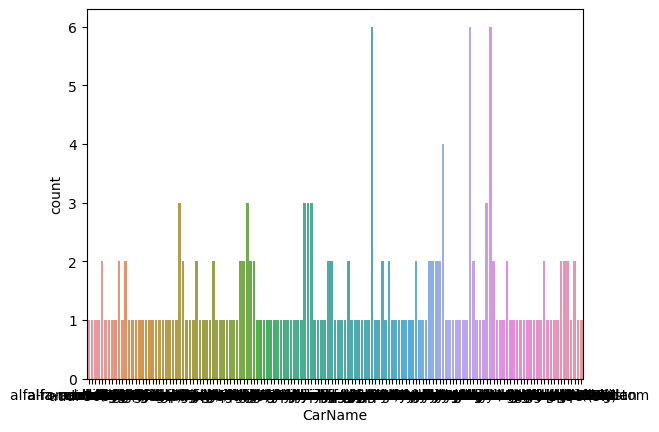

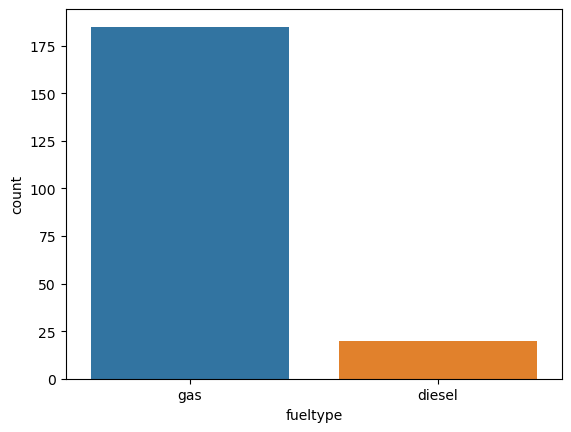

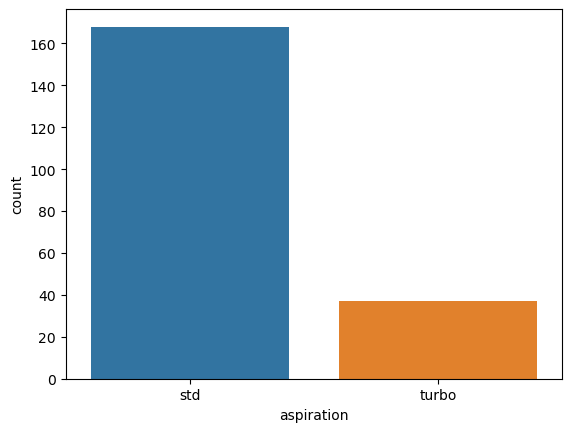

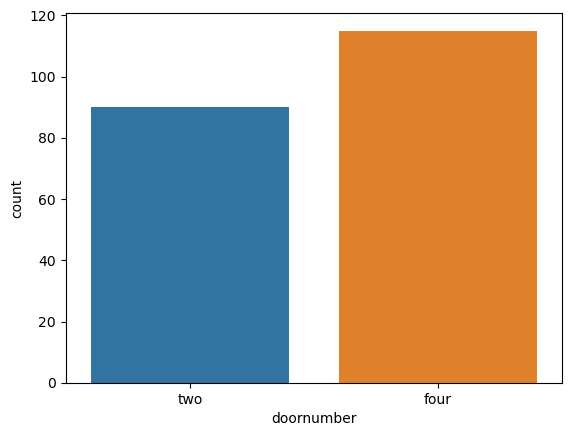

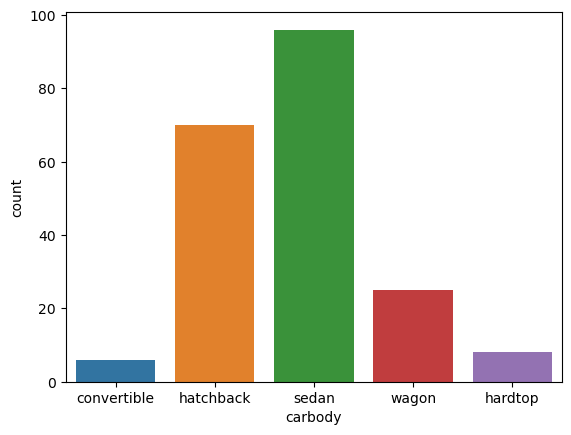

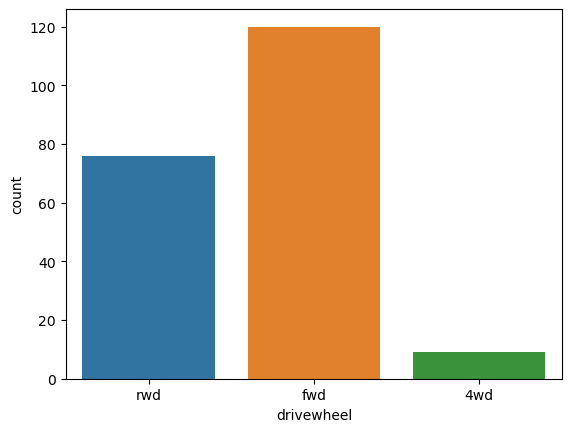

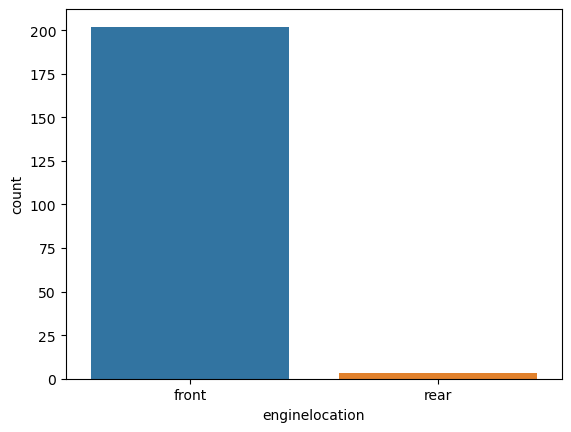

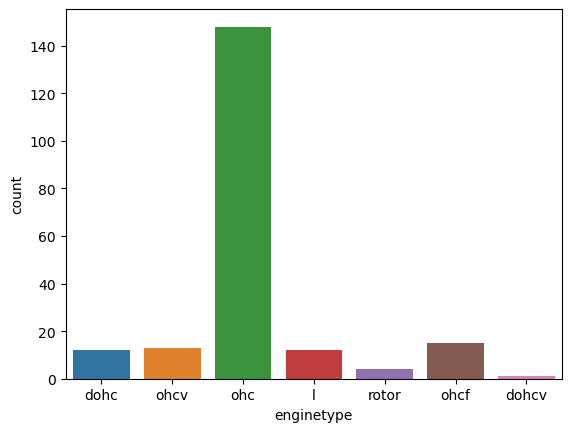

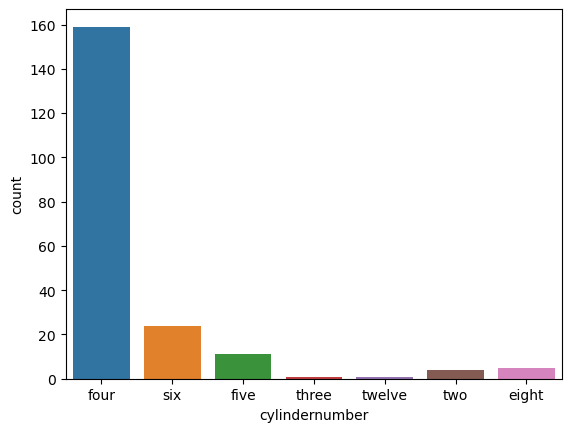

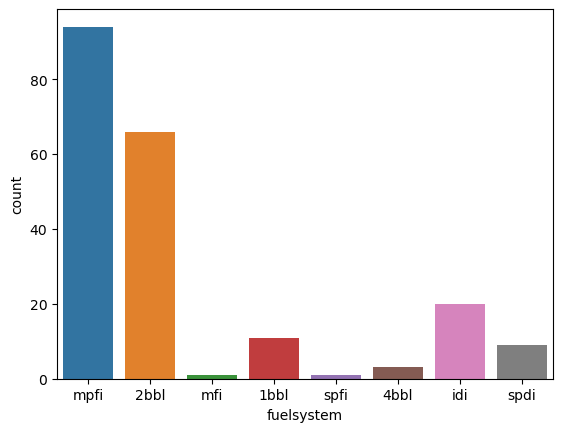

In [14]:
#Now, we can check the categorical features count 
for i in cat:
    sns.countplot(x=cat[i])
    plt.show()

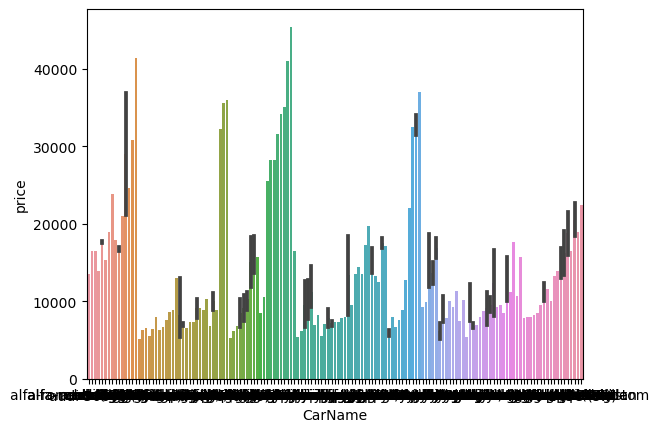

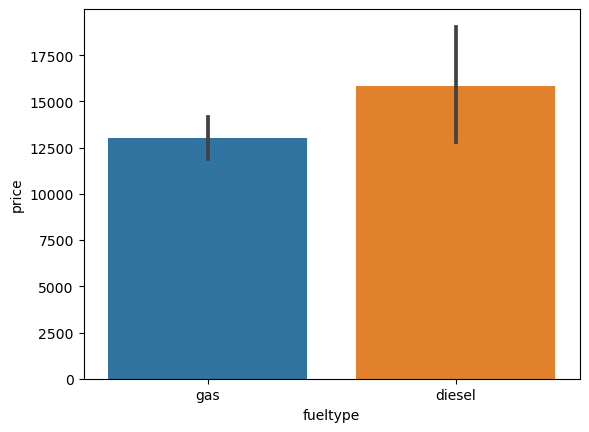

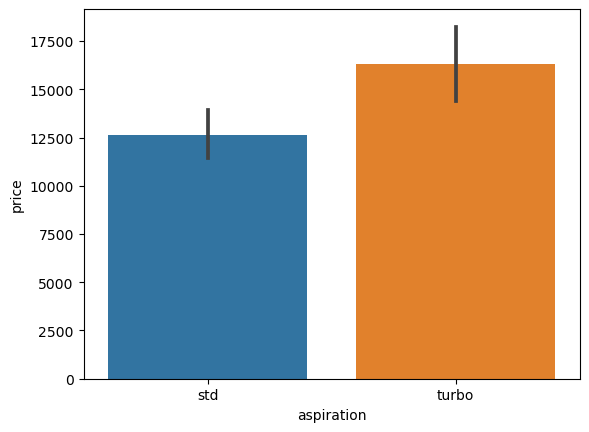

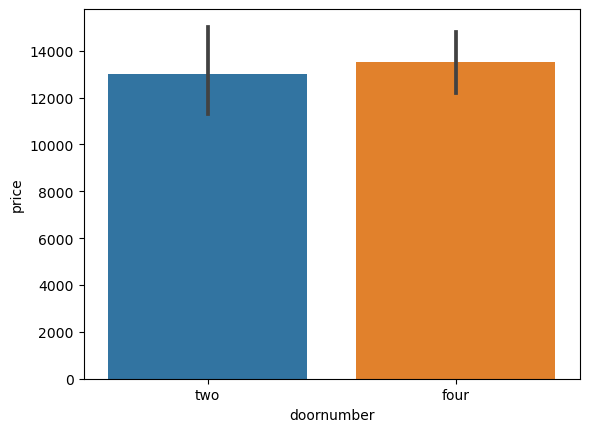

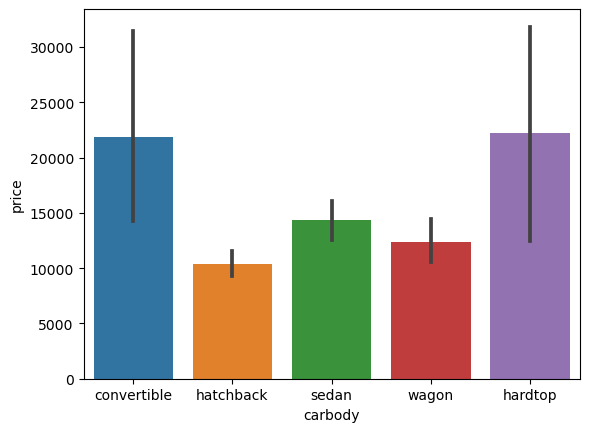

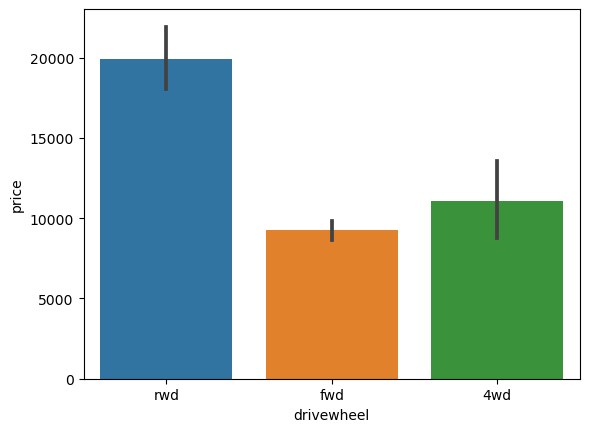

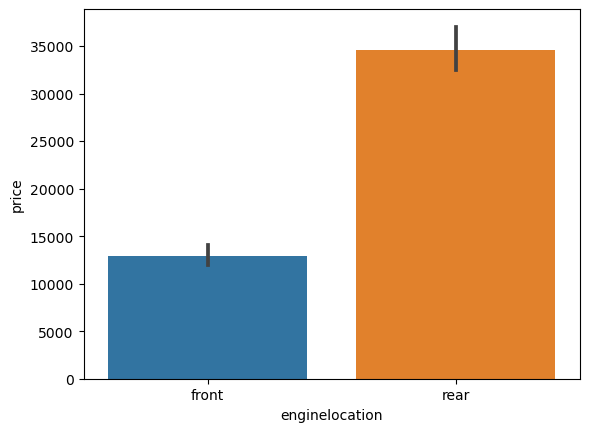

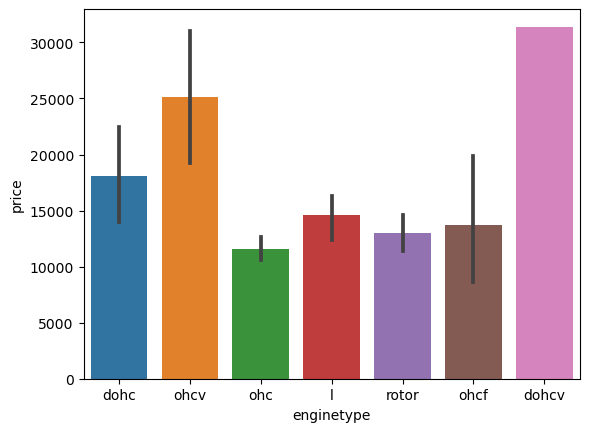

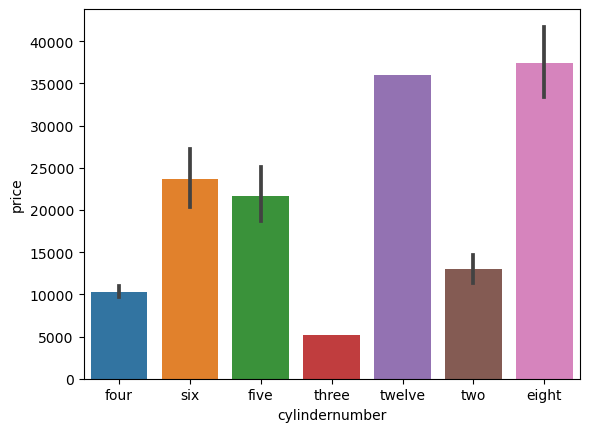

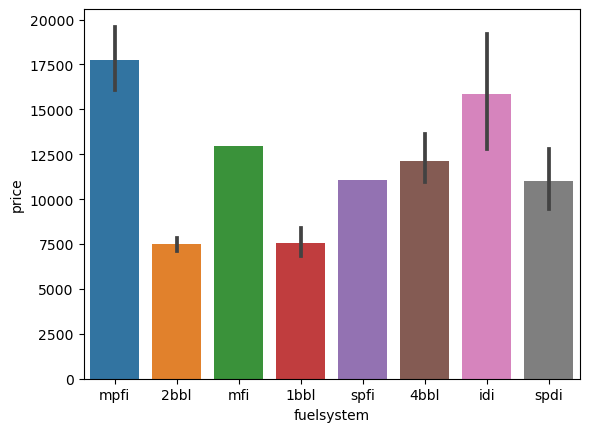

In [15]:
for i in cat:
    sns.barplot(df, x=df[i], y=df["price"])
    plt.show()

# Seperate data in X and Y as well as Split data into train and Test

In [16]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [17]:
# I am using a df1 data which was copy of the original data set.
x = df1.drop(["car_ID", "price"], axis=1) 
y = df1["price"] 

In [18]:
#for train test split import neccasary library
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=50, test_size=0.2)

In [19]:
train_x

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
180,-1,toyota starlet,gas,std,four,sedan,rwd,front,104.5,187.8,...,six,171,mpfi,3.27,3.35,9.20,156,5200,20,24
38,0,honda civic 1300,gas,std,two,hatchback,fwd,front,96.5,167.5,...,four,110,1bbl,3.15,3.58,9.00,86,5800,27,33
156,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,166.3,...,four,98,2bbl,3.19,3.03,9.00,70,4800,30,37
40,0,honda accord,gas,std,four,sedan,fwd,front,96.5,175.4,...,four,110,1bbl,3.15,3.58,9.00,86,5800,27,33
195,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,188.8,...,four,141,mpfi,3.78,3.15,9.50,114,5400,23,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,186.6,...,four,121,mpfi,3.54,3.07,9.31,110,5250,21,28
33,1,honda accord cvcc,gas,std,two,hatchback,fwd,front,93.7,150.0,...,four,92,1bbl,2.91,3.41,9.20,76,6000,30,34
109,0,peugeot 504 (sw),gas,std,four,wagon,rwd,front,114.2,198.9,...,four,120,mpfi,3.46,3.19,8.40,97,5000,19,24
139,2,subaru dl,gas,std,two,hatchback,fwd,front,93.7,157.9,...,four,108,2bbl,3.62,2.64,8.70,73,4400,26,31


In [20]:
#we can reset index
train_x.reset_index(inplace=True, drop=True)
test_x.reset_index(inplace=True, drop=True)

train_y.reset_index(inplace=True, drop=True)
test_y.reset_index(inplace=True, drop=True)

# Encoding using Catboost Encoder

In [21]:
#for create encoding for input variables we can seperate dataof numerical and categorical
train_cat = train_x.select_dtypes(include="object")
train_num = train_x.select_dtypes(include="number")

test_cat = test_x.select_dtypes(include="object")
test_num = test_x.select_dtypes(include="number")

In [22]:
train_cat

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,toyota starlet,gas,std,four,sedan,rwd,front,dohc,six,mpfi
1,honda civic 1300,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
2,toyota mark ii,gas,std,four,sedan,fwd,front,ohc,four,2bbl
3,honda accord,gas,std,four,sedan,fwd,front,ohc,four,1bbl
4,volvo 144ea,gas,std,four,wagon,rwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...
159,saab 99e,gas,std,two,hatchback,fwd,front,ohc,four,mpfi
160,honda accord cvcc,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
161,peugeot 504 (sw),gas,std,four,wagon,rwd,front,l,four,mpfi
162,subaru dl,gas,std,two,hatchback,fwd,front,ohcf,four,2bbl


In [23]:
import category_encoders as ce
encoder = ce.CatBoostEncoder()
encoder.fit(train_cat, train_y)

CatBoostEncoder(cols=['CarName', 'fueltype', 'aspiration', 'doornumber',
                      'carbody', 'drivewheel', 'enginelocation', 'enginetype',
                      'cylindernumber', 'fuelsystem'])

In [24]:
train_cat = encoder.transform(train_cat)
test_cat = encoder.transform(test_cat)

In [25]:
train_cat

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,13121.513551,13434.368051,13069.674208,13789.064262,14623.968470,20484.766260,13299.569183,18707.867332,23688.762637,17933.087898
1,13685.540652,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,13299.569183,11808.125706,10498.407586,8082.254065
2,10282.385163,13434.368051,13069.674208,13789.064262,14623.968470,9273.942533,13299.569183,11808.125706,10498.407586,7673.128248
3,10625.180217,13434.368051,13069.674208,13789.064262,14623.968470,9273.942533,13299.569183,11808.125706,10498.407586,8082.254065
4,15381.846884,13434.368051,13069.674208,13789.064262,12587.501767,20484.766260,13299.569183,11808.125706,10498.407586,17933.087898
...,...,...,...,...,...,...,...,...,...,...
159,14718.513551,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,13299.569183,11808.125706,10498.407586,17933.087898
160,13685.540652,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,13299.569183,11808.125706,10498.407586,8082.254065
161,13685.540652,13434.368051,13069.674208,13789.064262,12587.501767,20484.766260,13299.569183,14742.154065,10498.407586,17933.087898
162,9609.708130,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,13299.569183,15047.118512,10498.407586,7673.128248


In [26]:
# Now, we concat the both categorical and numerical data
train_x1 = pd.concat([train_num, train_cat], axis=1)
test_x1 = pd.concat([test_num, test_cat], axis=1)

In [27]:
train_x1.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,-1,104.5,187.8,66.5,54.1,3131,171,3.27,3.35,9.2,...,13121.513551,13434.368051,13069.674208,13789.064262,14623.968470,20484.766260,13299.569183,18707.867332,23688.762637,17933.087898
1,0,96.5,167.5,65.2,53.3,2289,110,3.15,3.58,9.0,...,13685.540652,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,13299.569183,11808.125706,10498.407586,8082.254065
2,0,95.7,166.3,64.4,53.0,2081,98,3.19,3.03,9.0,...,10282.385163,13434.368051,13069.674208,13789.064262,14623.968470,9273.942533,13299.569183,11808.125706,10498.407586,7673.128248
3,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.58,9.0,...,10625.180217,13434.368051,13069.674208,13789.064262,14623.968470,9273.942533,13299.569183,11808.125706,10498.407586,8082.254065
4,-1,104.3,188.8,67.2,57.5,3034,141,3.78,3.15,9.5,...,15381.846884,13434.368051,13069.674208,13789.064262,12587.501767,20484.766260,13299.569183,11808.125706,10498.407586,17933.087898


# Scaling Using MinmaxScaler

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
scaler.fit(train_x1)

MinMaxScaler()

In [29]:
train_x1 = pd.DataFrame(scaler.transform(train_x1), columns=train_x1.columns)
test_x1 = pd.DataFrame(scaler.transform(test_x1), columns=test_x1.columns)

In [30]:
train_x1.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,0.2,0.617241,0.759350,0.516667,0.525000,0.637316,0.415094,0.521429,0.609524,0.13750,...,0.231782,0.0,0.0,1.0,0.239783,1.0,0.0,0.616476,0.615027,1.000000
1,0.4,0.341379,0.429268,0.408333,0.458333,0.310706,0.184906,0.435714,0.719048,0.12500,...,0.264484,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.039876
2,0.4,0.313793,0.409756,0.341667,0.433333,0.230023,0.139623,0.464286,0.457143,0.12500,...,0.067171,0.0,0.0,1.0,0.239783,0.0,0.0,0.000000,0.000000,0.000000
3,0.4,0.341379,0.557724,0.183333,0.525000,0.342901,0.184906,0.435714,0.719048,0.12500,...,0.087046,0.0,0.0,1.0,0.239783,0.0,0.0,0.000000,0.000000,0.039876
4,0.2,0.610345,0.775610,0.575000,0.808333,0.599690,0.301887,0.885714,0.514286,0.15625,...,0.362835,0.0,0.0,1.0,0.112824,1.0,0.0,0.000000,0.000000,1.000000


# Model Building And Evaluation

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as Xgb
import catboost as cb

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
#LinerRegression
log_model = LinearRegression()
log_model.fit(train_x1, train_y)
pred_log = log_model.predict(test_x1)
mea_log = mean_absolute_error(test_y, pred_log)
mea_log

1862.0754026991408

In [34]:
log_model.score(train_x1, train_y)

0.9145827618690593

In [35]:
log_model.score(test_x1, test_y)

0.8439860393076992

In [36]:
#KNEARASTNEIGHBORS REGRESSOR
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(train_x1, train_y)
pred_knn = knn_model.predict(test_x1)
mea_knn = mean_absolute_error(test_y, pred_knn)
mea_knn

2346.491056097561

In [37]:
knn_model.score(train_x1, train_y)

0.7583043733079329

In [38]:
knn_model.score(test_x1, test_y)

0.7295957720460675

In [39]:
# SUPPORT VECTOR REGRESSOR
svm_model = SVR(kernel="rbf")
svm_model.fit(train_x1, train_y)
pred_svm = svm_model.predict(test_x1)
mea_svm = mean_absolute_error(test_y, pred_svm)
mea_svm

4405.829720847327

In [40]:
#DECISION TREE REGRESSOR 
dt_model = DecisionTreeRegressor(random_state=50)
dt_model.fit(train_x1, train_y)
pred_dt = dt_model.predict(test_x1)
mea_dt = mean_absolute_error(test_y, pred_dt)
mea_dt

1873.0365853658536

In [41]:
dt_model.score(train_x1, train_y)

0.9990939296264457

In [42]:
dt_model.score(test_x1, test_y)

0.835366233138423

In [43]:
#XGBOOST REGRESSOR
xgb_model = Xgb.XGBRegressor(n_estimators=100)
xgb_model.fit(train_x1, train_y)
pred_xgb = xgb_model.predict(test_x1)
mea_xgb = mean_absolute_error(test_y, pred_xgb)
mea_xgb

1492.0071217606708

In [44]:
xgb_model.score(train_x1, train_y)

0.9990933614444724

In [45]:
xgb_model.score(test_x1, test_y)

0.904477001109033

In [46]:
#RANDOM FOREST REGRESSOR
rfc_model = RandomForestRegressor(random_state=50)
rfc_model.fit(train_x1, train_y)
pred_rfc = rfc_model.predict(test_x1)
mea_rfc = mean_absolute_error(test_y, pred_rfc)
mea_rfc

1312.5139427642275

In [47]:
rfc_model.score(train_x1, train_y)

0.9891398153002534

In [48]:
rfc_model.score(test_x1, test_y)

0.9235170839824554

In [49]:
#ADABOOST REGRESSOR
from sklearn.ensemble import AdaBoostRegressor
adb_model = AdaBoostRegressor(random_state=50)
adb_model.fit(train_x1, train_y)
pred_adb = adb_model.predict(test_x1)
mea_adb = mean_absolute_error(test_y, pred_adb)
mea_adb

1722.7102183490472

In [50]:
adb_model.score(train_x1, train_y)

0.960733954988325

In [51]:
adb_model.score(test_x1, test_y)

0.8941449598689841

# HYPERPARAMTER TUNING

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
#HYPERPERAMETER TUING OF KNN
knn =KNeighborsRegressor()
params_knn= {'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance'], 
         "n_neighbors" : [1,25,14,13,26,85,45]}
clf2 = GridSearchCV(knn, params_knn, cv=5, scoring="neg_mean_absolute_error")
clf2.fit(train_x1, train_y)
print(clf2.best_params_)
print(-(clf2.best_score_))

{'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'distance'}
2494.429238083901


In [54]:
#HYPERPERAMETER TUNING OF SUPPORT VECTOR 
svm = SVR()
params_svm = {"gamma" :["scale", "auto"]}
clf4 = GridSearchCV(svm, params_svm, cv=5, scoring="neg_mean_absolute_error")
clf4.fit(train_x1, train_y)
print(clf4.best_params_)
print(-(clf4.best_score_))

{'gamma': 'scale'}
5857.0948700388735


In [55]:
#HYPERPERAMETER TUNING OF DECISION TREE 
dt = DecisionTreeRegressor()
params_dt = { 'max_depth' :[1,25,14,13,45,75,26],'splitter':['best', 'random']}
clf5 = GridSearchCV(dt, params_dt, cv=5, scoring="neg_mean_absolute_error")
clf5.fit(train_x1, train_y)
print(clf5.best_params_)
print(-(clf5.best_score_))

{'max_depth': 26, 'splitter': 'best'}
2079.834215151515


In [56]:
#HYPERPERAMETER TUNING OF RANDOMFOREST 
rfc = RandomForestRegressor()
params_rfc = {"n_estimators" : [10,15,125,10,8,85],"max_depth" : [10,25,48,85,42,3]}
clf6 = GridSearchCV(rfc, params_rfc, cv=5, scoring="neg_mean_absolute_error")
clf6.fit(train_x1, train_y)
print(clf6.best_params_)
print(-(clf6.best_score_))

{'max_depth': 10, 'n_estimators': 10}
1608.045970352032


In [57]:
#HYPERPERAMETER TUNING OF XGBOOST
xgb = Xgb.XGBRegressor()
params_xgb = {'eta': [0.1, 0.2, 0.3,0.4,0.5], 'n_estimators' : [10, 50, 100,12,15], 'max_depth': [3, 6, 9,14]}
clf7 = GridSearchCV(xgb, params_xgb, cv=5, scoring="neg_mean_absolute_error")
clf7.fit(train_x1, train_y)
print(clf7.best_params_)
print(-(clf7.best_score_))

{'eta': 0.3, 'max_depth': 3, 'n_estimators': 12}
1654.4771265676786


In [58]:
#HYPERPERAMETER TUNING OF ADABOOST
adb = AdaBoostRegressor()
params_adb = {'n_estimators' : [10, 50, 100,12,15]}
clf8 = GridSearchCV(adb, params_adb, cv=5, scoring="neg_mean_absolute_error")
clf8.fit(train_x1, train_y)
print(clf8.best_params_)
print(-(clf8.best_score_))

{'n_estimators': 12}
1942.4232639553607


In [59]:
#best perameter for model
print("KNeighborsRegressor score is :", clf2.best_params_)
print("Support vector machine score is :", clf4.best_params_)
print("DecisionTreeRegressor score is :", clf5.best_params_)
print("RandomForestRegressor score is :", clf6.best_params_)
print("XGBOOST score is :", clf7.best_params_)
print("AdaBoostRegressor score is :", clf8.best_params_)

KNeighborsRegressor score is : {'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'distance'}
Support vector machine score is : {'gamma': 'scale'}
DecisionTreeRegressor score is : {'max_depth': 26, 'splitter': 'best'}
RandomForestRegressor score is : {'max_depth': 10, 'n_estimators': 10}
XGBOOST score is : {'eta': 0.3, 'max_depth': 3, 'n_estimators': 12}
AdaBoostRegressor score is : {'n_estimators': 12}


In [60]:
#Score for all model
print("KNeighborsRegressor score is :", -clf2.best_score_)
print("Support vector machine score is :", -clf4.best_score_)
print("DecisionTreeRegressor score is :", -clf5.best_score_)
print("RandomForestRegressor score is :", -clf6.best_score_)
print("XGBOOST score is :", -clf7.best_score_)
print("AdaBoostRegressor score is :", -clf8.best_score_)

KNeighborsRegressor score is : 2494.429238083901
Support vector machine score is : 5857.0948700388735
DecisionTreeRegressor score is : 2079.834215151515
RandomForestRegressor score is : 1608.045970352032
XGBOOST score is : 1654.4771265676786
AdaBoostRegressor score is : 1942.4232639553607


# Feature Selection

In [61]:
corr = train_x1.corr()
corr.style.background_gradient(cmap='coolwarm')

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
symboling,1.000000,-0.578304,-0.390113,-0.248365,-0.526122,-0.250262,-0.134253,-0.162739,-0.094843,-0.138442,0.041720,0.298979,-0.010920,0.071724,-0.010792,-0.168656,-0.139669,-0.660961,0.059908,-0.080845,0.237181,0.067769,-0.007060,0.015097
wheelbase,-0.578304,1.000000,0.867582,0.771214,0.591112,0.759793,0.529871,0.472559,0.233869,0.276306,0.320702,-0.359770,-0.444372,-0.524224,0.258350,0.340227,0.309735,0.485944,0.079006,0.470344,-0.212719,0.154616,0.314598,0.472859
carlength,-0.390113,0.867582,1.000000,0.827044,0.470846,0.876853,0.674825,0.602451,0.159160,0.162644,0.542183,-0.263725,-0.667301,-0.706315,0.307601,0.218323,0.256531,0.419589,0.211546,0.533570,-0.059901,0.304882,0.428817,0.633303
carwidth,-0.248365,0.771214,0.827044,1.000000,0.237273,0.867648,0.735210,0.558945,0.187711,0.175197,0.639089,-0.199603,-0.639629,-0.670228,0.369344,0.224837,0.291672,0.202060,0.132693,0.515855,-0.061146,0.349761,0.571120,0.602246
carheight,-0.526122,0.591112,0.470846,0.237273,1.000000,0.242780,0.031296,0.153063,0.021950,0.256479,-0.132944,-0.323789,-0.015309,-0.079328,0.068102,0.294276,0.155802,0.555275,0.032433,-0.001609,-0.124708,-0.136303,-0.051041,0.135930
curbweight,-0.250262,0.759793,0.876853,0.867648,0.242780,1.000000,0.863212,0.651217,0.177018,0.156818,0.760007,-0.230956,-0.757775,-0.800212,0.382338,0.218850,0.329624,0.210491,0.237191,0.691589,0.052068,0.502473,0.634563,0.674265
enginesize,-0.134253,0.529871,0.674825,0.735210,0.031296,0.863212,1.000000,0.567905,0.175712,0.030569,0.812254,-0.208542,-0.650781,-0.673568,0.339512,0.064077,0.094739,0.039682,0.382170,0.563847,0.213736,0.585707,0.745415,0.544771
boreratio,-0.162739,0.472559,0.602451,0.558945,0.153063,0.651217,0.567905,1.000000,-0.065173,-0.004414,0.576831,-0.197435,-0.591458,-0.595222,0.328687,0.040716,0.222926,0.146058,0.286698,0.596098,0.202688,0.256641,0.222448,0.482546
stroke,-0.094843,0.233869,0.159160,0.187711,0.021950,0.177018,0.175712,-0.065173,1.000000,0.200171,0.023415,-0.099984,-0.013091,-0.020002,-0.039512,0.250699,0.166480,0.065233,-0.080718,-0.053329,-0.158035,-0.173906,0.101578,0.072782
compressionratio,-0.138442,0.276306,0.162644,0.175197,0.256479,0.156818,0.030569,-0.004414,0.200171,1.000000,-0.186903,-0.426311,0.303622,0.231322,0.042433,0.984621,0.333890,0.167571,0.069714,0.116051,-0.020864,-0.089856,-0.027239,0.123483


In [62]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [63]:
corr_features = correlation(train_x1, 0.7)
len(set(corr_features))

9

In [64]:
corr_features

{'carlength',
 'carwidth',
 'citympg',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'fueltype',
 'highwaympg',
 'horsepower'}

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
label_encoder = LabelEncoder()
categorical_labels = label_encoder.fit_transform(train_y)  

selector = SelectKBest(score_func=chi2, k=9)
selector.fit(train_x1, categorical_labels)


SelectKBest(k=9, score_func=<function chi2 at 0x0000026D07CE2320>)

In [66]:
train_x1.columns[selector.get_support()]

Index(['compressionratio', 'fueltype', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(train_x1, categorical_labels)

ExtraTreesClassifier()

In [68]:
print(model.feature_importances_)

[0.03838191 0.0470145  0.04979188 0.04186319 0.06225254 0.12788082
 0.03876581 0.03906442 0.03808178 0.03694287 0.04472997 0.04336357
 0.05476364 0.05119548 0.09452813 0.00513165 0.01301257 0.03345145
 0.05890118 0.01966169 0.00134083 0.02081258 0.01515469 0.02391286]


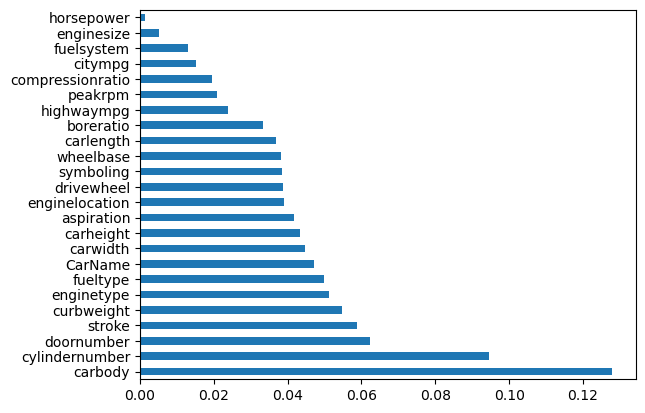

In [69]:
feat_importance = pd.Series(model.feature_importances_, index=x.columns)
feat_importance.nlargest(26).plot(kind="barh")
plt.show()

In [70]:
#Apply SelectKbest class to extract top Features
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(train_x1,categorical_labels)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
features = pd.concat([dfcolumns, dfscores], axis=1)
features.columns = ["specs", "score"]
features

,specs,score
0,symboling,18.022609
1,CarName,16.372104
2,fueltype,12.133704
3,aspiration,10.996294
4,doornumber,13.152871
5,carbody,16.141302
6,drivewheel,16.246778
7,enginelocation,10.689274
8,wheelbase,5.988593
9,carlength,46.766794


In [71]:
from sklearn.ensemble import RandomForestClassifier
fe_model = RandomForestClassifier(random_state=50)

fe_model.fit(train_x1, categorical_labels)

RandomForestClassifier(random_state=50)

In [72]:
feature_scores = pd.Series(fe_model.feature_importances_, index=train_x.columns).sort_values(ascending=False)
feature_scores

carbody             0.110586
cylindernumber      0.080961
doornumber          0.072819
carwidth            0.056263
curbweight          0.054876
fueltype            0.054374
aspiration          0.052511
enginetype          0.050929
carlength           0.049689
drivewheel          0.048289
CarName             0.045783
stroke              0.045180
enginelocation      0.044269
carheight           0.043742
wheelbase           0.043452
symboling           0.039086
boreratio           0.028178
peakrpm             0.019195
highwaympg          0.017722
compressionratio    0.013915
citympg             0.011500
fuelsystem          0.010661
enginesize          0.003963
horsepower          0.002058
dtype: float64

After Feature Selection drop the features of noies and regenerate the model

In [73]:
df2.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [74]:
X = df2.drop(["car_ID", "enginesize", "horsepower", "price", "enginelocation", 'carlength', 'carwidth', 'carheight', 'curbweight', 'fuelsystem', 'citympg'], axis=1)
Y = df2["price"]

In [75]:
X

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,enginetype,cylindernumber,boreratio,stroke,compressionratio,peakrpm,highwaympg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,dohc,four,3.47,2.68,9.0,5000,27
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,88.6,dohc,four,3.47,2.68,9.0,5000,27
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,94.5,ohcv,six,2.68,3.47,9.0,5000,26
3,2,audi 100 ls,gas,std,four,sedan,fwd,99.8,ohc,four,3.19,3.40,10.0,5500,30
4,2,audi 100ls,gas,std,four,sedan,4wd,99.4,ohc,five,3.19,3.40,8.0,5500,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,109.1,ohc,four,3.78,3.15,9.5,5400,28
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,109.1,ohc,four,3.78,3.15,8.7,5300,25
202,-1,volvo 244dl,gas,std,four,sedan,rwd,109.1,ohcv,six,3.58,2.87,8.8,5500,23
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,109.1,ohc,six,3.01,3.40,23.0,4800,27


In [76]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, random_state=50, test_size=0.2)

In [77]:
train_X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,enginetype,cylindernumber,boreratio,stroke,compressionratio,peakrpm,highwaympg
180,-1,toyota starlet,gas,std,four,sedan,rwd,104.5,dohc,six,3.27,3.35,9.2,5200,24
38,0,honda civic 1300,gas,std,two,hatchback,fwd,96.5,ohc,four,3.15,3.58,9.0,5800,33
156,0,toyota mark ii,gas,std,four,sedan,fwd,95.7,ohc,four,3.19,3.03,9.0,4800,37
40,0,honda accord,gas,std,four,sedan,fwd,96.5,ohc,four,3.15,3.58,9.0,5800,33
195,-1,volvo 144ea,gas,std,four,wagon,rwd,104.3,ohc,four,3.78,3.15,9.5,5400,28


In [78]:
#we can reset index
train_X.reset_index(inplace=True, drop=True)
test_X.reset_index(inplace=True, drop=True)

train_Y.reset_index(inplace=True, drop=True)
test_Y.reset_index(inplace=True, drop=True)

In [79]:
train_cat1 = train_X.select_dtypes(include="object")
train_num1 = train_X.select_dtypes(include="number")

test_cat1 = test_X.select_dtypes(include="object")
test_num1 = test_X.select_dtypes(include="number")

In [80]:
train_cat1

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber
0,toyota starlet,gas,std,four,sedan,rwd,dohc,six
1,honda civic 1300,gas,std,two,hatchback,fwd,ohc,four
2,toyota mark ii,gas,std,four,sedan,fwd,ohc,four
3,honda accord,gas,std,four,sedan,fwd,ohc,four
4,volvo 144ea,gas,std,four,wagon,rwd,ohc,four
...,...,...,...,...,...,...,...,...
159,saab 99e,gas,std,two,hatchback,fwd,ohc,four
160,honda accord cvcc,gas,std,two,hatchback,fwd,ohc,four
161,peugeot 504 (sw),gas,std,four,wagon,rwd,l,four
162,subaru dl,gas,std,two,hatchback,fwd,ohcf,four


In [81]:
encoder.fit(train_cat1, train_Y)
train_cat1 = encoder.transform(train_cat1)
test_cat1 = encoder.transform(test_cat1)

In [82]:
train_cat1

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber
0,13121.513551,13434.368051,13069.674208,13789.064262,14623.968470,20484.766260,18707.867332,23688.762637
1,13685.540652,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,11808.125706,10498.407586
2,10282.385163,13434.368051,13069.674208,13789.064262,14623.968470,9273.942533,11808.125706,10498.407586
3,10625.180217,13434.368051,13069.674208,13789.064262,14623.968470,9273.942533,11808.125706,10498.407586
4,15381.846884,13434.368051,13069.674208,13789.064262,12587.501767,20484.766260,11808.125706,10498.407586
...,...,...,...,...,...,...,...,...
159,14718.513551,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,11808.125706,10498.407586
160,13685.540652,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,11808.125706,10498.407586
161,13685.540652,13434.368051,13069.674208,13789.064262,12587.501767,20484.766260,14742.154065,10498.407586
162,9609.708130,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,15047.118512,10498.407586


In [83]:
train_X = pd.concat([train_num1, train_cat1], axis=1)
test_X = pd.concat([test_num1, test_cat1], axis=1)

In [84]:
train_X

,symboling,wheelbase,boreratio,stroke,compressionratio,peakrpm,highwaympg,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber
0,-1,104.5,3.27,3.35,9.20,5200,24,13121.513551,13434.368051,13069.674208,13789.064262,14623.968470,20484.766260,18707.867332,23688.762637
1,0,96.5,3.15,3.58,9.00,5800,33,13685.540652,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,11808.125706,10498.407586
2,0,95.7,3.19,3.03,9.00,4800,37,10282.385163,13434.368051,13069.674208,13789.064262,14623.968470,9273.942533,11808.125706,10498.407586
3,0,96.5,3.15,3.58,9.00,5800,33,10625.180217,13434.368051,13069.674208,13789.064262,14623.968470,9273.942533,11808.125706,10498.407586
4,-1,104.3,3.78,3.15,9.50,5400,28,15381.846884,13434.368051,13069.674208,13789.064262,12587.501767,20484.766260,11808.125706,10498.407586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,3,99.1,3.54,3.07,9.31,5250,28,14718.513551,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,11808.125706,10498.407586
160,1,93.7,2.91,3.41,9.20,6000,34,13685.540652,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,11808.125706,10498.407586
161,0,114.2,3.46,3.19,8.40,5000,24,13685.540652,13434.368051,13069.674208,13789.064262,12587.501767,20484.766260,14742.154065,10498.407586
162,2,93.7,3.62,2.64,8.70,4400,31,9609.708130,13434.368051,13069.674208,13550.384829,10777.771565,9273.942533,15047.118512,10498.407586


In [85]:
scaler.fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), columns=train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns)

In [86]:
test_X.head()

,symboling,wheelbase,boreratio,stroke,compressionratio,peakrpm,highwaympg,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber
0,0.4,0.951724,0.657143,0.057143,0.08750,0.346939,0.210526,0.372069,0.0,0.0,1.0,0.112824,1.000000,0.262149,0.000000
1,0.8,0.406897,0.771429,0.680952,0.14375,0.265306,0.368421,0.264484,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000
2,0.4,0.503448,0.550000,0.533333,0.12500,0.040816,0.315789,0.264484,0.0,0.0,0.0,0.239783,1.000000,0.000000,0.615027
3,0.4,1.182759,0.900000,0.609524,0.06250,0.142857,0.000000,0.264484,0.0,0.0,1.0,0.239783,1.000000,1.000000,1.000000
4,0.4,0.358621,0.771429,0.271429,0.04375,0.265306,0.342105,0.264484,0.0,1.0,1.0,0.239783,0.214571,0.289397,0.000000


In [87]:
#KNeighborsRegressor
knn1 = KNeighborsRegressor(algorithm="auto", n_neighbors=14, weights="distance")
knn1.fit(train_X, train_Y)
pred1 = knn1.predict(test_X)
mea_knn1 = mean_absolute_error(test_Y,pred1)
mea_knn1

2336.4669472990554

In [88]:
knn1.score(test_X, test_Y)

0.667114714416121

In [89]:
#SVR
svm1 = SVR(gamma="scale")
svm1.fit(train_X, train_Y)
pred2 = svm1.predict(test_X)
mea_svm = mean_absolute_error(test_Y, pred2)
mea_svm

4411.585208835385

In [90]:
#DecisionTreeRegressor
dt1 = DecisionTreeRegressor( max_depth=45, splitter="best")
dt1.fit(train_X, train_Y)
pred3 = dt1.predict(test_X)
mea_dt = mean_absolute_error(test_Y, pred3)
mea_dt

1500.621951219512

In [91]:
dt1.score(test_X, test_Y)

0.8344006282029793

In [92]:
#RandomForestRegressor
rfc1 = RandomForestRegressor(max_depth=25 ,n_estimators= 15)
rfc1.fit(train_X, train_Y)
pred4 = rfc1.predict(test_X)
mea_rfc = mean_absolute_error(test_Y, pred4)
mea_rfc

1178.684498102981

In [93]:
rfc1.score(test_X, test_Y)

0.942488779940313

In [94]:
rfc1.score(train_X, train_Y)

0.9789761134166135

In [95]:
#XGBRegressor
xgb = Xgb.XGBRegressor(eta=0.3 ,max_depth=3 ,n_estimators= 12)
xgb.fit(train_X, train_Y)
pred5 = xgb.predict(test_X)
mea_xgb = mean_absolute_error(test_Y, pred5)
mea_xgb

1363.2071265243903

In [96]:
xgb.score(train_X, train_Y)

0.9569576336137279

In [97]:
xgb.score(test_X, test_Y)

0.9326547476323311

In [98]:
#AdaBoostRegressor
adb = AdaBoostRegressor(n_estimators= 15)
adb.fit(train_X, train_Y)
pred6 = adb.predict(test_X)
mea_adb1 = mean_absolute_error(test_Y, pred6)
mea_adb1

1418.285329668117

In [99]:
adb.score(test_X, test_Y)

0.9243458301093536

In [100]:
print('KNeighborsRegressor MAE is: ', mea_knn1)
print('KNeighborsRegressor training score is: ', knn1.score(train_X, train_Y))
print('KNeighborsRegressor test score is : ', knn1.score(test_X, test_Y))
print()
print('DecisionTreeRegressor MAE is :', mea_dt)
print('DecisionTreeRegressor training score is: ', dt1.score(train_X, train_Y))
print('DecisionTreeRegressor test score is : ', dt1.score(test_X, test_Y))
print()
print('RandomForestRegressor MAE is :', mea_rfc)
print('RandomForestRegressor training score is: ', rfc1.score(train_X, train_Y))
print('RandomForestRegressor test score is : ', rfc1.score(test_X, test_Y))
print()
print('xgboostregression MAE is :', mea_xgb)
print('xgboostregression training score is: ', xgb.score(train_X, train_Y))
print('xgboostregression test score is : ', xgb.score(test_X, test_Y))
print()
print('AdaBoostRegressor MAE is :', mea_adb1)
print('AdaBoostRegressor training score is: ', adb.score(train_X, train_Y))
print('AdaBoostRegressor test score is : ', adb.score(test_X, test_Y))
print()

KNeighborsRegressor MAE is:  2336.4669472990554
KNeighborsRegressor training score is:  0.9989318339613448
KNeighborsRegressor test score is :  0.667114714416121

DecisionTreeRegressor MAE is : 1500.621951219512
DecisionTreeRegressor training score is:  0.9989318339613448
DecisionTreeRegressor test score is :  0.8344006282029793

RandomForestRegressor MAE is : 1178.684498102981
RandomForestRegressor training score is:  0.9789761134166135
RandomForestRegressor test score is :  0.942488779940313

xgboostregression MAE is : 1363.2071265243903
xgboostregression training score is:  0.9569576336137279
xgboostregression test score is :  0.9326547476323311

AdaBoostRegressor MAE is : 1418.285329668117
AdaBoostRegressor training score is:  0.9440312926868266
AdaBoostRegressor test score is :  0.9243458301093536



# Testing the Model 

In [101]:
X.head(1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,enginetype,cylindernumber,boreratio,stroke,compressionratio,peakrpm,highwaympg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,88.6,dohc,four,3.47,2.68,9.0,5000,27


In [102]:
new_df = {'symboling': 0, 'CarName':"bmw X2", 'fueltype' : 'gas', 'aspiration':"turbo" ,
          "doornumber":"four", "carbody":"convertible", 'drivewheel': "rwd", 'wheelbase':98.0,
          'enginetype':'ohcf',  'cylindernumber':'four', 'boreratio': 4.51, 'stroke':3.68,
          'compressionratio':9.0,  'peakrpm': 5500, 'highwaympg': 22}
index = [0]

In [103]:
new_df = pd.DataFrame(new_df, index=index)

In [104]:
new_df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,enginetype,cylindernumber,boreratio,stroke,compressionratio,peakrpm,highwaympg
0,0,bmw X2,gas,turbo,four,convertible,rwd,98.0,ohcf,four,4.51,3.68,9.0,5500,22


In [105]:
new_cat = new_df.select_dtypes(include="object")
new_num = new_df.select_dtypes(include="number")

In [106]:
new_cat = encoder.transform(new_cat)

In [107]:
new_cat

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber
0,13685.540652,13434.368051,16720.882416,13789.064262,20718.36295,20484.76626,15047.118512,10498.407586


In [108]:
new_df = pd.concat([new_num, new_cat], axis=1)

In [109]:
new_df

,symboling,wheelbase,boreratio,stroke,compressionratio,peakrpm,highwaympg,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber
0,0,98.0,4.51,3.68,9.0,5500,22,13685.540652,13434.368051,16720.882416,13789.064262,20718.36295,20484.76626,15047.118512,10498.407586


In [110]:
new_df =pd.DataFrame(scaler.transform(new_df), columns=new_df.columns)
new_df

,symboling,wheelbase,boreratio,stroke,compressionratio,peakrpm,highwaympg,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber
0,0.4,0.393103,1.407143,0.766667,0.125,0.55102,0.157895,0.264484,0.0,1.0,1.0,0.619725,1.0,0.289397,0.0


In [111]:
Pred_new = rfc1.predict(new_df)

In [112]:
Pred_new

array([15973.51111111])

In [113]:
X["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [114]:
new_df1 = {'symboling': 3, 'CarName':"wagon R", 'fueltype' : 'gas', 'aspiration':"std" ,
          "doornumber":"four", "carbody":"wagon", 'drivewheel': "rwd", 'wheelbase':98.0,
          'enginetype':'dohc',  'cylindernumber':'three', 'boreratio': 4.51, 'stroke':4,
          'compressionratio':8.0,  'peakrpm': 5000, 'highwaympg': 29}
index = [0]

In [115]:
new_df1 = pd.DataFrame(new_df1, index=index)

In [116]:
new_df1

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,enginetype,cylindernumber,boreratio,stroke,compressionratio,peakrpm,highwaympg
0,3,wagon R,gas,std,four,wagon,rwd,98.0,dohc,three,4.51,4,8.0,5000,29


In [117]:
new_cat = new_df1.select_dtypes(include="object")
new_num = new_df1.select_dtypes(include="number")

In [118]:
new_cat = encoder.transform(new_cat)

In [119]:
new_cat

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber
0,13685.540652,13434.368051,13069.674208,13789.064262,12587.501767,20484.76626,18707.867332,13685.540652


In [120]:
new_df1 = pd.concat([new_num, new_cat], axis=1)
new_df1

,symboling,wheelbase,boreratio,stroke,compressionratio,peakrpm,highwaympg,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber
0,3,98.0,4.51,4,8.0,5000,29,13685.540652,13434.368051,13069.674208,13789.064262,12587.501767,20484.76626,18707.867332,13685.540652


In [121]:
new_df1 =pd.DataFrame(scaler.transform(new_df1), columns=new_df1.columns)
new_df1

,symboling,wheelbase,boreratio,stroke,compressionratio,peakrpm,highwaympg,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber
0,1.0,0.393103,1.407143,0.919048,0.0625,0.346939,0.342105,0.264484,0.0,0.0,1.0,0.112824,1.0,0.616476,0.148606


In [122]:
pred_new = rfc1.predict(new_df1)
pred_new

array([19505.56666667])

# Conclusion

In conclusion, our car price prediction journey involved a comprehensive and systematic process that encompassed various essential steps. We began with Exploratory Data Analysis (EDA), gaining valuable insights into the dataset's characteristics and distributions. This allowed us to better understand the relationships between different features and the target variable, setting the stage for effective modeling.

Following EDA, we carefully partitioned our dataset into training and test sets, ensuring an unbiased evaluation of model performance. Encoding categorical variables and applying feature scaling were crucial steps that facilitated optimal model training by transforming and normalizing the data appropriately.

Hyperparameter tuning played a pivotal role in fine-tuning the models' configurations. This process allowed us to identify the best set of hyperparameters that maximized predictive accuracy and generalization. We meticulously searched through various parameter combinations to strike the right balance between bias and variance.

Feature selection, a key aspect of model refinement, involved choosing the most relevant and informative features to enhance model efficiency and interpretability. By excluding noise and redundant information, we aimed to improve the model's ability to generalize to new, unseen data.

Throughout this journey, the RandomForestRegressor emerged as the most promising model for car price prediction. Its robust performance was a result of its adaptability to complex relationships, demonstrated by its low Mean Absolute Error (MAE), which is a 1178.684498102981, high training score is (97%) 0.9789761134166135, and impressive test score is (94%) 0.942488779940313. This model's ability to capture intricate patterns and its consistent performance across various evaluation metrics make it a strong contender for accurate car price predictions.